In [1]:
%matplotlib inline
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Research Question & Hypothesis

## Introduction

## Dataset

## Methods

## Conclusion & Limitations

## References & Contributions

# Monkey Resting ECoG Data
Recorded from monkey whole cortex. ECoG sampled at 1000Hz, 3 channels. From **Yanagawa et al., PLOS ONE, 2013.**

In this experiment, the monkey is sitting in a chair with no task demands. 5 minutes of data each are provided during 3 different stages: awake eyes open, awake eyes closed, and anesthesized. They are stored in `ecog_eyesopen`,`ecog_eyesclosed`, and `ecog_anes` respectively. The sampling rate is provided, from which you can compute the time vectors (they can have their own time vectors all starting from 0s).

`labels` contains information about which brain regions the 3 channels are located in, while `elec_num` has the electrode number, which you can find on the brain map image included in the same folder (brainmap.jpg).

dict_keys(['__header__', '__version__', '__globals__', 'ecog_anes', 'ecog_eyesclosed', 'ecog_eyesopen', 'elec_num', 'fs', 'labels'])
1000
(3, 300000)
['cingulate' 'occipital' 'temporal']
[52 70 91]


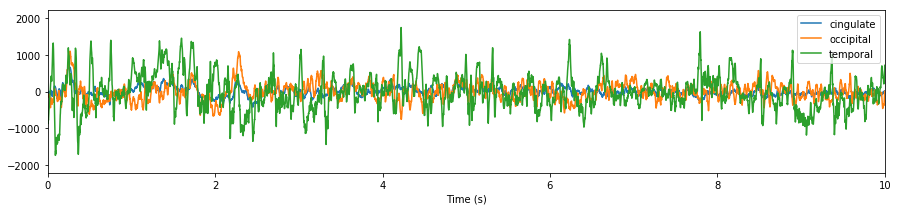

In [2]:
monkey_ecog_data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)
print(monkey_ecog_data.keys())
print(monkey_ecog_data['fs'])
print(monkey_ecog_data['ecog_eyesopen'].shape)
print(monkey_ecog_data['labels'])
print(monkey_ecog_data['elec_num'])

plt.figure(figsize=(15,3))
plt.plot(np.arange(0,monkey_ecog_data['ecog_eyesopen'].shape[1]/monkey_ecog_data['fs'],1/monkey_ecog_data['fs']), 
         monkey_ecog_data['ecog_eyesopen'].T)
plt.xlim([0,10])
plt.xlabel('Time (s)')
plt.legend(monkey_ecog_data['labels'])

In [18]:
monkey_ecog_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jul 24 20:09:57 2019',
 '__version__': '1.0',
 '__globals__': [],
 'ecog_anes': array([[  68,   66,   76, ...,   39,   39,   31],
        [-634, -627, -618, ..., -893, -869, -868],
        [-283, -280, -260, ...,  -96,  -73,  -95]], dtype=int16),
 'ecog_eyesclosed': array([[ 207,  201,  205, ...,   29,   39,   30],
        [ -32,   10,   26, ..., -195, -187, -180],
        [ -59,  -64,  -98, ...,  -32,  -29,    3]], dtype=int16),
 'ecog_eyesopen': array([[ -17,  -28,  -33, ...,  -59,  -70,  -76],
        [-117, -118, -100, ..., -132, -143, -143],
        [-792, -826, -875, ..., -524, -495, -427]], dtype=int16),
 'elec_num': array([52, 70, 91], dtype=uint8),
 'fs': 1000,
 'labels': array(['cingulate', 'occipital', 'temporal'], dtype=object)}

In [6]:
ecog_eyesopen = monkey_ecog_data['ecog_eyesopen']

In [7]:
image = Image(filename='ECoG_monkey/brainmap.jpg') 

In [8]:
eyesopen_cingulate = monkey_ecog_data['ecog_eyesopen'][0,:]
eyesopen_occipital = monkey_ecog_data['ecog_eyesopen'][1,:]
eyesopen_temporal = monkey_ecog_data['ecog_eyesopen'][2,:]

eyesclosed_cingulate = monkey_ecog_data['ecog_eyesclosed'][0,:]
eyesclosed_occipital = monkey_ecog_data['ecog_eyesclosed'][1,:]
eyesclosed_temporal = monkey_ecog_data['ecog_eyesclosed'][2,:]

anes_cingulate =  monkey_ecog_data['ecog_anes'][0,:]
anes_occipital =  monkey_ecog_data['ecog_anes'][1,:]
anes_temporal =  monkey_ecog_data['ecog_anes'][2,:]

elec_num = monkey_ecog_data['elec_num']
fs = monkey_ecog_data['fs']
labels = monkey_ecog_data['labels']

In [9]:
N = ecog_eyesopen.shape[1]
t_eyesopen = np.arange(0, N/fs, 1/fs)
t_eyesclosed = np.arange(0, N/fs, 1/fs)
t_anes = np.arange(0, N/fs, 1/fs)

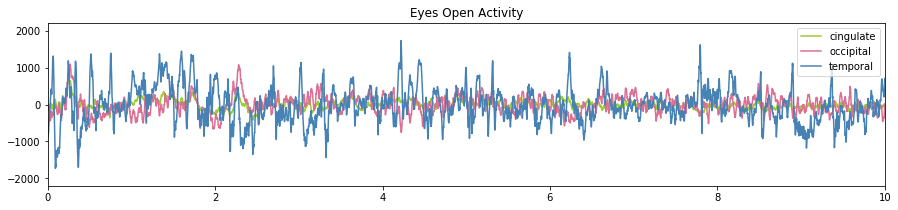

In [10]:
plt.figure(figsize = (15,3))
plt.plot(t_eyesopen, eyesopen_cingulate, color = 'yellowgreen', label = 'cingulate')
plt.plot(t_eyesopen, eyesopen_occipital,color = 'palevioletred', label = 'occipital')
plt.plot(t_eyesopen, eyesopen_temporal ,color = 'steelblue', label = 'temporal')
plt.title("Eyes Open Activity")
plt.xlim(0,10)
plt.legend()

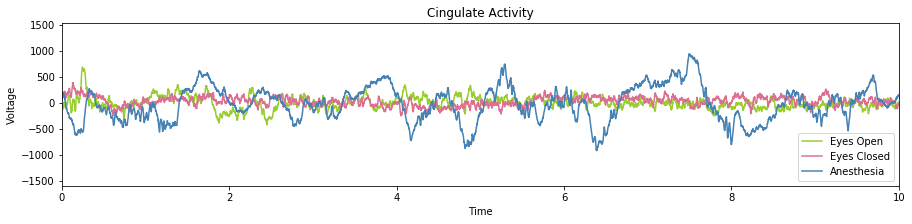

In [11]:

plt.figure(figsize = (15,3))
plt.plot(t_eyesopen, eyesopen_cingulate, color = 'yellowgreen', label = 'Eyes Open')
plt.plot(t_eyesopen, eyesclosed_cingulate, color = 'palevioletred', label = 'Eyes Closed')
plt.plot(t_eyesopen, anes_cingulate ,color = 'steelblue', label = 'Anesthesia')
plt.xlim(0,10)
plt.title("Cingulate Activity")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.legend()

### Fourier Transform

Text(0, 0.5, 'Values')

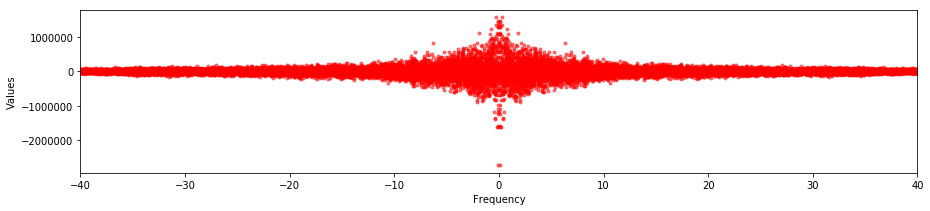

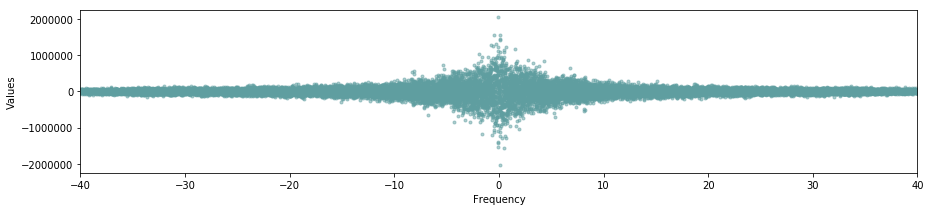

In [12]:
freqs = np.fft.fftfreq(N,1/fs)
F_lfp_np = np.fft.fft(eyesopen_cingulate)


plt.figure(figsize=(15,3))
plt.plot(freqs, F_lfp_np.real,'.', label='Real',alpha=0.5, color = 'red')
plt.xlim([-40,40]);
plt.xlabel("Frequency")
plt.ylabel("Values")
#plt.legend()

plt.figure(figsize=(15,3))
plt.plot(freqs, F_lfp_np.imag, '.', label='Imaginary', alpha=0.5, color = 'cadetblue')
plt.xlim([-40,40]);
plt.xlabel("Frequency")
plt.ylabel("Values")

In [13]:
def compute_pwsp(sig, fs):
    N = len(sig)
    pwsp = np.abs(np.fft.fft(sig))**2
    freqs = np.fft.fftfreq(N, 1/fs)[np.arange(0,N)]
    return pwsp, freqs

(-20, 20)

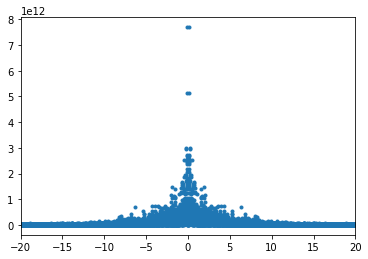

In [14]:
np_power = np.abs(F_lfp_np)**2
plt.plot(freqs, np_power, '.')
plt.xlim([-20,20])

### Short-Time Fourier Transform

In [15]:
def slide_window_time(T,len_win,len_overlap):
    # T is total signal time, len_win is window length in seconds, len_overlap is overlap length in seconds
    len_between = round(len_win-len_overlap,2)
    t_steps =  [i/1000 for i in range(0,int(T*1000-len_overlap*1000),int(len_between*1000))]
    return np.array(t_steps)
    
def slide_window_index(T,fs,len_win,len_overlap):
    len_between = round(1-len_overlap,2)
    i_steps = [i for i in range(0,int(T*1000-len_overlap*1000),int(len_between*1000))]
                
    return np.array(i_steps)
    

def my_stft(data, fs, len_win, len_overlap):
    T = int(data.shape[0]/fs)
    t_stft = np.array(slide_window_time(T, len_win, len_overlap))
    ind_stft = (t_stft*1000).astype(int)
    sig_windows = [data[i : i + int(fs*len_win)] for i in ind_stft]
    stft = (np.array(np.fft.fft(sig_windows))).T
    f_stft = compute_pwsp(sig_windows[0], fs)[1]
    positive_fs = np.logical_or(f_stft>=0, f_stft==-fs/2)    
    return abs(f_stft[positive_fs]), t_stft, stft[positive_fs, :]

def plot_spectrogram(spg, t, f, freq_lims=[0,100], plot_db=False):
    """
    Utility function for plotting the spectrogram for you.
    
    spg: spectrogram, 2D real-numbered array, dimensions are [frequency x time]
    t: time axis of spectrogram
    f: frequency axis of spectrogram
    freq_lims (optional): limits the frequency axis, defaults to 0-100Hz
    """
    plt.figure(figsize=(15,4))
    if plot_db:
        plt.imshow(10*np.log10(spg), aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    else:
        plt.imshow(spg, aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    plt.xlabel('Time'); plt.ylabel('Frequency(Hz)');
    plt.ylim(freq_lims)
    plt.colorbar()
    plt.tight_layout()

Text(0.5, 1.0, 'My Spectrogram')

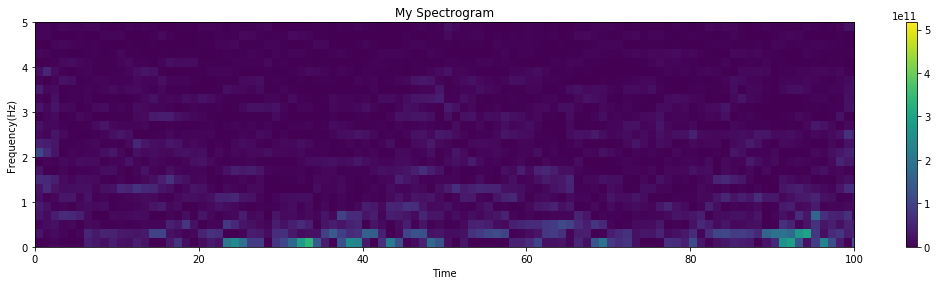

In [16]:
len_win = 5.
len_overlap = 4.

# computing and plotting your spectrogram
f_stft, t_stft, stft = my_stft(eyesopen_occipital, fs, len_win, len_overlap) 
spg = np.abs(stft)**2
plot_spectrogram(spg, t_stft, f_stft, freq_lims=[0,50], plot_db=False)
plt.ylim(0,5)
plt.xlim(0,100)

plt.title('My Spectrogram')

In [17]:
anes_f_welch, p_welch = signal.welch(anes_cingulate,fs,window='boxcar',nperseg=int(fs*len_win),noverlap=int(fs*len_overlap))
anes_p_welch = p_welch*fs**2*len_win/2

open_f_welch, p_welch = signal.welch(eyesopen_cingulate,fs,window='boxcar',nperseg=int(fs*len_win),noverlap=int(fs*len_overlap))
open_p_welch = p_welch*fs**2*len_win/2

closed_f_welch, p_welch = signal.welch(eyesclosed_cingulate,fs,window='boxcar',nperseg=int(fs*len_win),noverlap=int(fs*len_overlap))
closed_p_welch = p_welch*fs**2*len_win/2

plt.plot(anes_f_welch, anes_p_welch, color = 'cadetblue', label = 'Anesthesia')
plt.plot(open_f_welch, open_p_welch, color = 'palevioletred', label= 'Open')
plt.plot(closed_f_welch, closed_p_welch, color = 'yellowgreen', label = 'Closed')

plt.xlim([0,20])
plt.xlabel("Frequency")
plt.ylabel("Power/Hz")
plt.legend()

NameError: name 'signal' is not defined

In [ ]:
from scipy import io, signal # we will also import the signal module, from scipy

In [ ]:
FIR_theta = signal.firwin(751, [1,6], fs=fs, pass_zero=False)
theta_osc = np.convolve(eyesopen_occipital, FIR_theta,mode='same')
x_a_theta = signal.hilbert(theta_osc)

def compute_power_phase(x_a):
     
    return (np.abs(x_a)**2), np.angle(x_a)

theta_power, theta_phase = compute_power_phase(x_a_theta)


plt.figure(figsize=(15,12))
# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_eyesopen, eyesopen_occipital, color = 'cadetblue', label='Original')
plt.plot(t_eyesopen, theta_osc,color = 'palevioletred', label='Filtered')
plt.ylabel("Signal")
plt.xlabel("Time")
plt.xlim(0,2)
plt.legend()

# plot the real and imaginary components of the analytic signal
plt.subplot(4,1,2)
plt.plot(t_eyesopen, x_a_theta.real,color = 'cadetblue', label = 'Real')
plt.plot(t_eyesopen, x_a_theta.imag, color = 'palevioletred', label = 'Imaginary')
plt.xlabel("Time")
plt.ylabel("Coefficients")
plt.xlim(0,2)
plt.legend()

# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_eyesopen,theta_power, color = 'cadetblue')
plt.xlim(0,2)
plt.xlabel("Time")
plt.ylabel("Power")

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_eyesopen,theta_phase, color = 'cadetblue')
plt.xlim(0,2)
plt.xlabel("Time")
plt.ylabel("Phase")
plt.tight_layout()

In [ ]:
# compute gamma power and phase
FIR_gamma =  signal.firwin(251, [20,40], fs=fs, pass_zero=False)
gamma_osc = np.convolve(eyesopen_occipital, FIR_gamma,mode='same')
x_a_gamma = signal.hilbert(gamma_osc)
gamma_power, gamma_phase =  compute_power_phase(x_a_gamma)

peak_inds = np.where(np.logical_and(theta_phase>-np.pi/2, theta_phase<np.pi/2))[0]
trough_inds = np.where(np.logical_or(theta_phase<-np.pi/2, theta_phase>np.pi/2))[0]

plt.figure(figsize=(15,3))

# plot the theta peak and trough phases
plt.plot(t_eyesopen[peak_inds], theta_phase[peak_inds], '.', color = 'lightblue', label = 'Theta Peak')
plt.plot(t_eyesopen[trough_inds], theta_phase[trough_inds], '.', color = 'lightpink', label = 'Theta Trough')

# plot the gamma power corresponding to theta peak and trough phases
plt.plot(t_eyesopen[peak_inds], gamma_power[peak_inds], '.', color = 'cadetblue', label ='Gamma Peak')
plt.plot(t_eyesopen[trough_inds], gamma_power[trough_inds], '.', color = 'palevioletred', label = 'Gamma Trough')
plt.xlabel("Time (s)")
#plt.ylabel("")
plt.xlim(0,2)
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist((gamma_power[peak_inds])**(1/2), 100, color='cadetblue',normed=True, histtype='step', label='Peak');
plt.hist((gamma_power[trough_inds])**(1/2), 100, color='palevioletred',normed=True, histtype='step', label='Trough');
plt.ylabel("Frequency")
plt.xlabel("Amplitude")
plt.legend()
#plt.xlim(0,2)
